In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



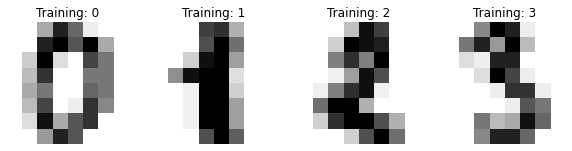

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



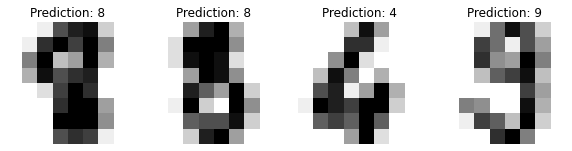

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


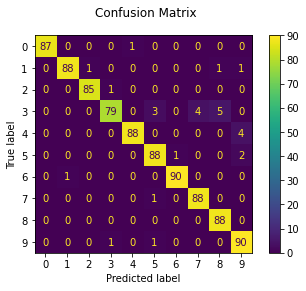

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo_1.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

'NoneType' object has no attribute 'split'


Gray image: 


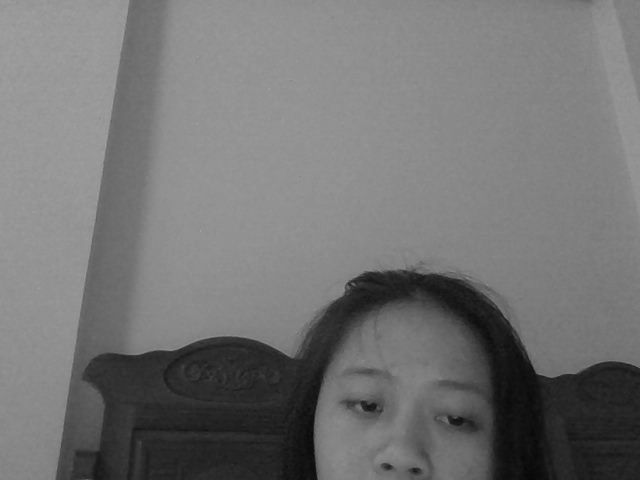

In [ ]:
path_img = "photo_1.jpg" #lấy đường dẫn hình ảnh

gray_image = cv2.imread(path_img, 0) #đọc hình và chuyển về ảnh trắng đen
print('Gray image: ')
cv2_imshow(gray_image)


Croppped image: 


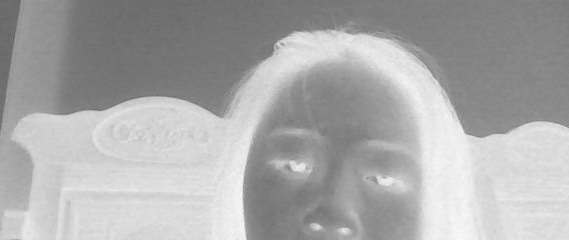

Resized image: 


array([[146, 111, 111, 118, 123, 122, 125, 129],
       [150, 112, 119, 121, 219, 212, 129, 134],
       [150, 119, 117, 158, 149, 229, 133, 135],
       [155, 125, 207, 208, 133, 161, 137, 138],
       [203, 208, 212, 227, 150, 160, 237, 220],
       [207, 213, 207, 150, 152, 155, 238, 221],
       [208, 208, 211, 134, 134, 165, 245, 221],
       [217, 218, 219, 143, 167, 148, 243, 220]], dtype=uint8)

In [ ]:
def crop_img(inImg):
  inImg = 255 - inImg[:, :]

  maxUp = inImg.shape[0]//2
  maxDown = inImg.shape[0]//2
  maxLeft = inImg.shape[1]//2
  maxRight = inImg.shape[1]//2

  for i in range(inImg.shape[0]):
    for j in range(inImg.shape[1]):
      if inImg[i][j] > 200:
        if maxUp >= i: maxUp = i
        if maxDown <= i: maxDown = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j

  editedImg = inImg[maxUp:maxDown+1, maxLeft:maxRight+1] 
  return editedImg
croppedImg = crop_img(gray_image)
print('Croppped image: ')
cv2_imshow(croppedImg)
resizedImg =  cv2.resize(croppedImg,(8,8))
print('Resized image: ')
cv2_imshow(resizedImg)
resizedImg


Text(0.5, 1.0, 'Prediction: [1]')

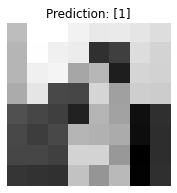

In [ ]:
input_data = resizedImg/16
predict_input_data = clf.predict(input_data.reshape(1,64))
_, ax = plt.subplots(figsize=(4, 3))
ax.set_axis_off()
image = resizedImg
ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f'Prediction: {predict_input_data}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

path_imgs = '/content/drive/MyDrive/digits_no'
imgs_test = os.listdir(path=path_imgs)

In [ ]:
n_imgs = len(imgs_test)

In [ ]:
for i in range(n_imgs):
  __path = path_imgs + imgs_test[i]
 
 #truy xuất hình ảnh trong tệp chưa qua xử lý
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
  ax_ori = axes[0]
  original = cv2.imread(__path)
  ax_ori.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB), interpolation='nearest')
  ax_ori.set_title(f'Original Image')

 #truy xuất hình ảnh trong tệp sau bước xử lý sang màu đen trắng
  ax_ori = axes[1]
  gray_original = cv2.imread(__path,0)
  ax_ori.imshow(gray_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Gray Image')
  
  #cắt hình ảnh từ hình ảnh trắng đen theo quy tắc loại bỏ các pixels trắng ở mức tối thiểu, chỉ để tâm đến các pixels đen ở hàm crop_img ở trên
  ax_ori = axes[2]
  crop_original = crop_img(gray_original)
  ax_ori.imshow(crop_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Gray Image After Cropping')
  
 #vì hình đọc từ open cv sẽ có tỉ lệ rơi vào khoảng [0,255] để tương thích với model của sklearn ta phải scale hình về tỉ lệ [0,16] và resize hình về size (8,8) pixels
  ax_ori = axes[3]
  resized_img = cv2.resize(crop_original,(8,8))
  scaled_img = resized_img/16
  predicted_our_datas = clf.predict(scaled_img.reshape(1,64)) #dự đoán hình ảnh từ tập dữ liệu sau khi đã qua tất cả các bước tiền xử lý
  ax_ori.imshow(resized_img, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Predition:{predicted_our_datas}')
